In [1]:
import numpy as np
import tensorflow as tf

In [2]:
np.random.seed(101)
tf.set_random_seed(101)

In [3]:
rand_a = np.random.uniform(0,100,(5,5))

In [4]:
rand_b = np.random.uniform(0,100,(5,1))

In [5]:
rand_b

array([[ 99.43179012],
       [ 52.06653967],
       [ 57.87895355],
       [ 73.48190583],
       [ 54.19617722]])

In [6]:
# now we need to define the placeholder
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)

In [7]:
add_op = tf.add(a,b)

In [8]:
mul_op = tf.multiply(a,b)

In [13]:
with tf.Session() as sess:
    add_result = sess.run(add_op,feed_dict={a:rand_a,b:rand_b})
    mul_result = sess.run(mul_op,feed_dict={a:rand_a,b:rand_b})

In [12]:
add_result

array([[ 151.07165527,  156.49855042,  102.27921295,  116.58396149,
         167.95948792],
       [ 135.45622253,   82.76316071,  141.42784119,  124.22093201,
          71.06043243],
       [ 113.30171204,   93.09214783,   76.06819153,  136.43911743,
         154.42727661],
       [  96.7172699 ,   81.83804321,  133.83674622,  146.38117981,
         101.10578918],
       [ 122.72680664,  105.98292542,   59.04463196,   67.98310089,
          72.89292145]], dtype=float32)

In [14]:
mul_result

array([[ 5134.64404297,  5674.25      ,   283.12432861,  1705.47070312,
         6813.83154297],
       [ 4341.8125    ,  1598.26696777,  4652.73388672,  3756.8293457 ,
          988.9463501 ],
       [ 3207.8112793 ,  2038.10290527,  1052.77416992,  4546.98046875,
         5588.11572266],
       [ 1707.37902832,   614.02526855,  4434.98876953,  5356.77734375,
         2029.85546875],
       [ 3714.09838867,  2806.64379883,   262.76763916,   747.19854736,
         1013.29199219]], dtype=float32)

In [15]:
n_feature = 5
n_dense_layer = 3

In [17]:
x = tf.placeholder(tf.float32,(None,n_feature))

In [20]:
W = tf.Variable(tf.random_normal([n_feature,n_dense_layer]))
b = tf.Variable(tf.ones([n_dense_layer]))

In [23]:
xW= tf.matmul(x,W)

In [24]:
z = tf.add(xW,b)

In [26]:
a = tf.sigmoid(z)

In [27]:
init = tf.global_variables_initializer()

In [29]:
with tf.Session() as sess:
    sess.run(init)
    res = sess.run(a,feed_dict={x:np.random.random([1,n_feature])})

In [31]:
print(res)

[[ 0.77431256  0.9127394   0.80246115]]


# Regression Example

In [33]:
# it pick 10 points between 0 to 10 and then we will add certain noise to it
x_data = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)

In [34]:
y_label = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

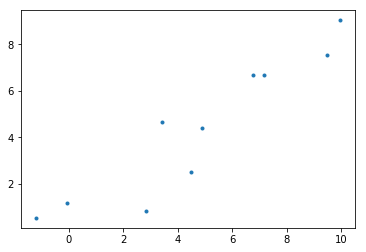

In [38]:
plt.plot(x_data,y_label, '.')

### let us plot a straight line to predict this linear trend



y = mx + b

In [39]:
m = tf.Variable(0.44)
b = tf.Variable(0.87)

In [40]:
error = 0

for x,y in zip(x_data,y_label):
    y_hat = m*x + b
    error = (y - y_hat) ** 2

    

In [42]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001) # define what optimizer you want to use for training the model
train = optimizer.minimize(error) # train the model with the defined optimizer

Again note we need to first define all the variable and operation we need to perform, before running the session to 
actually perform the task. one more point to again mention is that we need to initialize all the tensorflow varaibles before 
using it.

In [47]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    num_of_training = 1000
    for i in range(num_of_training):
            sess.run(train)
    
    final_slope, fin_intercept = sess.run([m,b])    

In [48]:
final_slope

0.81573749

In [49]:
fin_intercept

0.90771353

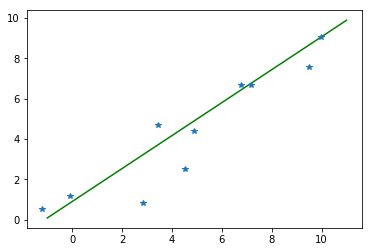

In [50]:
x_test = np.linspace(-1,11,10)
y_pred = final_slope * x_test + fin_intercept

plt.plot(x_test,y_pred,'g')
plt.plot(x_data,y_label,'*')
